In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# import statsmodels.api as sm
from matplotlib import cm
# import matplotlib.cm as cmx
# import matplotlib.colors as colors
plt.rcParams["font.sans-serif"] = "Arial"


from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 3
plt.rcParams["font.sans-serif"] = "Arial"
matplotlib.rcParams.update({'font.size': 8})
# plt.rcParams['mathtext.fontset'] = 'custom'
# plt.rcParams['mathtext.rm'] = 'Arial'
# plt.rcParams['mathtext.it'] = 'Arial:italic'
#plt.rcParams['mathtext.bf'] = 'Arial:bold'
import matplotlib as mpl
# import mpld3
# from mpld3 import plugins
%matplotlib inline

#import seaborn as sns
#mpl.rcParams['legend.scatterpoints '] = 1

In [15]:
df = pd.read_csv('Data/HoplandNADP-NTN.csv', skiprows=3)
df.head()

,SiteID,Date On,Date Off,ldCa,Ca,ldMg,Mg,ldK,K,ldNa,...,Lab Cond,Field Cond,FV Cond,Svol,RG Ppt,Sub Ppt,Lab Type,Valcode,Invalcode,Notes
0,CA45,10/03/1979,10/09/1979,,-9.00,,-9.000,,-9.000,,...,-9.0,-9.0,-,0.0,0.00,0.00,da,d,,na
1,CA45,10/09/1979,10/16/1979,,0.08,,0.035,,0.030,,...,6.0,5.6,i,-9.0,10.67,10.67,w,w,,NaN
2,CA45,10/16/1979,10/23/1979,,0.04,,0.074,,0.024,,...,6.0,8.0,i,2951.0,44.70,44.70,w,w,,NaN
3,CA45,10/23/1979,10/30/1979,<,0.02,,0.010,,0.010,,...,2.4,4.5,i,4241.0,65.79,65.79,w,w,,NaN
4,CA45,10/30/1979,11/06/1979,,0.05,,0.048,,0.014,,...,6.4,8.8,i,2986.5,47.75,47.75,w,w,,NaN


In [16]:
df['date']=pd.to_datetime(df['Date Off'])

In [30]:
df.replace(to_replace=-9,value=np.nan,inplace=True)

In [61]:
df.columns

Index([u'SiteID', u'Date On', u'Date Off', u'ldCa', u'Ca', u'ldMg', u'Mg',
       u'ldK', u'K', u'ldNa', u'Na', u'ldNH4', u'NH4', u'ldNO3', u'NO3',
       u'ldCl', u'Cl', u'ldSO4', u'SO4', u'pH Lab', u'pH Field', u'pH FV',
       u'Lab Cond', u'Field Cond', u'FV Cond', u'Svol', u'RG Ppt', u'Sub Ppt',
       u'Lab Type', u'Valcode', u'Invalcode', u'Notes', u'date'],
      dtype='object')

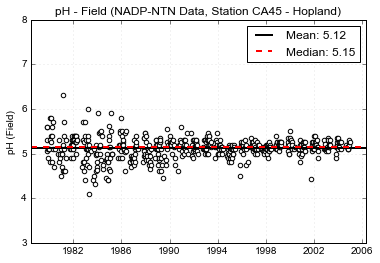

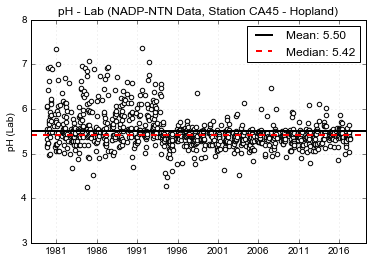

In [77]:
fig,ax=plt.subplots()

plt.scatter(df['date'].values,df['pH Field'].values,facecolor='white')
plt.ylim([3,8])
# plt.yscale('log')



ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.grid(alpha=0.2)
plt.axhline(df['pH Field'].mean(),label='Mean: '+format(df['pH Field'].mean(), '.2f') ,color='k',lw=2)
plt.axhline(df['pH Field'].median(),label='Median: '+format(df['pH Field'].median(), '.2f') ,ls='--',color='red',lw=2)
plt.ylabel('pH (Field)')
plt.legend()
plt.title('pH - Field (NADP-NTN Data, Station CA45 - Hopland)')
plt.savefig('Figures\\pH - Field -Precipitation Timeseries, NADP-NTN Data, Station CA45 - Hopland.pdf')
plt.show()

fig,ax=plt.subplots()

plt.scatter(df['date'].values,df['pH Lab'].values,facecolor='white')
plt.ylim([3,8])
# plt.yscale('log')



ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.grid(alpha=0.2)
plt.axhline(df['pH Lab'].mean(),label='Mean: '+format(df['pH Lab'].mean(), '.2f') ,color='k',lw=2)
plt.axhline(df['pH Lab'].median(),label='Median: '+format(df['pH Lab'].median(), '.2f'),ls='--',color='red',lw=2)
plt.ylabel('pH (Lab)')
plt.legend()
plt.title('pH - Lab (NADP-NTN Data, Station CA45 - Hopland)')
plt.savefig('Figures\\pH - Lab -Precipitation Timeseries, NADP-NTN Data, Station CA45 - Hopland.pdf')
plt.show()

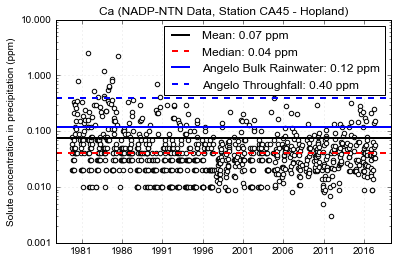

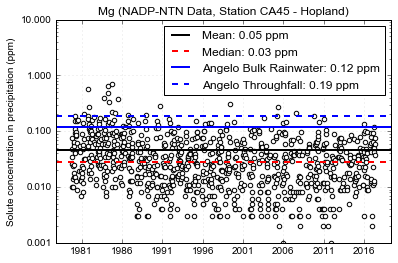

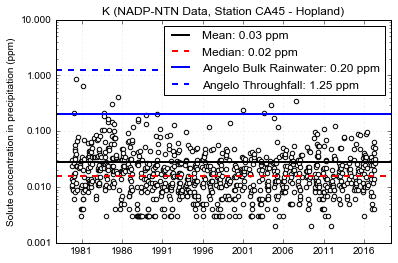

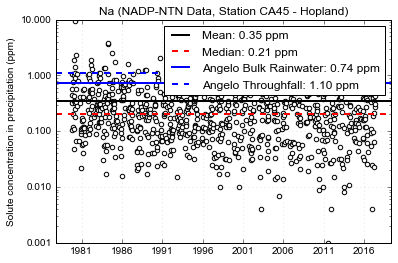

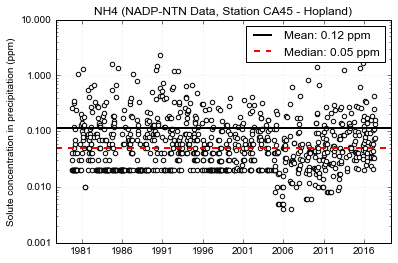

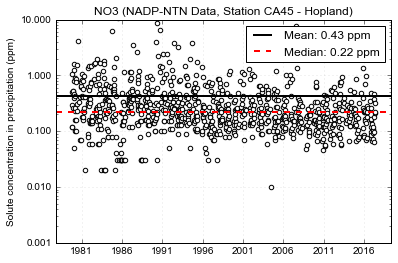

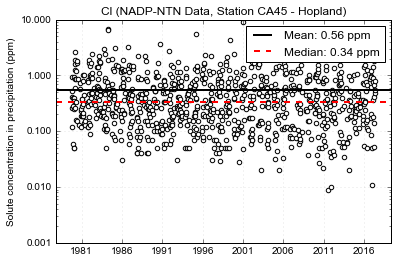

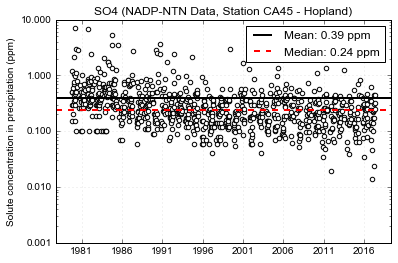

In [76]:
solutes = ['Ca', 'Mg', 'K', 'Na', 'NH4', 'NO3', 'Cl', 'SO4']


for solute in solutes:
    fig,ax=plt.subplots()

    plt.scatter(df['date'].values,df[solute].values,facecolor='white')
    plt.ylim([0.001,10])
    plt.yscale('log')



    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    plt.grid(alpha=0.2)
    plt.axhline(df[solute].mean(),label='Mean: '+format(df[solute].mean(), '.2f') + ' ppm',color='k',lw=2)
    plt.axhline(df[solute].median(),label='Median: '+format(df[solute].median(), '.2f') + ' ppm',ls='--',color='red',lw=2)
    
    if solute == 'Ca':
        plt.axhline(0.12,label='Angelo Bulk Rainwater: 0.12 ppm',color='b',lw=2)    
        plt.axhline(0.40,label='Angelo Throughfall: 0.40 ppm',color='b',lw=2,ls='--')    
    if solute == 'Mg':
        plt.axhline(0.12,label='Angelo Bulk Rainwater: 0.12 ppm',color='b',lw=2)    
        plt.axhline(0.19,label='Angelo Throughfall: 0.19 ppm',color='b',lw=2,ls='--')    
    if solute == 'K':
        plt.axhline(0.20,label='Angelo Bulk Rainwater: 0.20 ppm',color='b',lw=2)    
        plt.axhline(1.25,label='Angelo Throughfall: 1.25 ppm',color='b',lw=2,ls='--')    
    if solute == 'Na':
        plt.axhline(.74,label='Angelo Bulk Rainwater: 0.74 ppm',color='b',lw=2)    
        plt.axhline(1.10,label='Angelo Throughfall: 1.10 ppm',color='b',lw=2,ls='--')    

    
    
    plt.ylabel('Solute concentration in precipitation (ppm)')
    plt.legend()
    plt.title(solute + ' (NADP-NTN Data, Station CA45 - Hopland)')
    plt.savefig('Figures\\'+solute + ' -Precipitation Timeseries, NADP-NTN Data, Station CA45 - Hopland.pdf')
    plt.show()

In [75]:
df[['Ca', 'Mg', 'K', 'Na', 'NH4', 'NO3', 'Cl', 'SO4', 'pH Field', 'pH Lab']].describe().to_excel('HoplandPrecipSummary.xls')


In [83]:
df.index=df['date']

In [85]:
df['doy'] = df.index.dayofyear

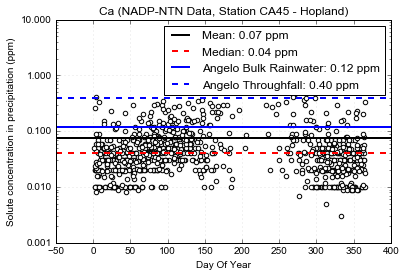

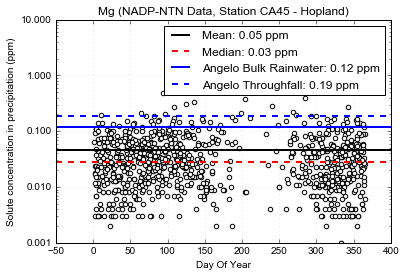

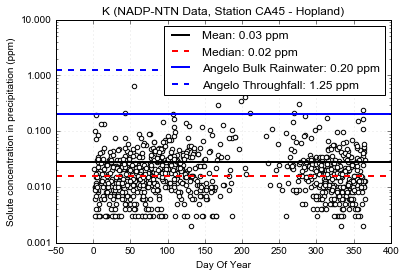

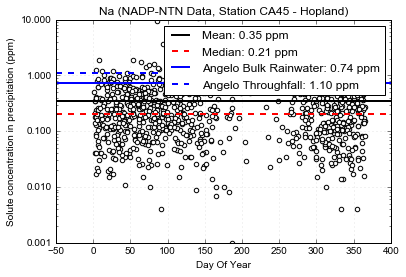

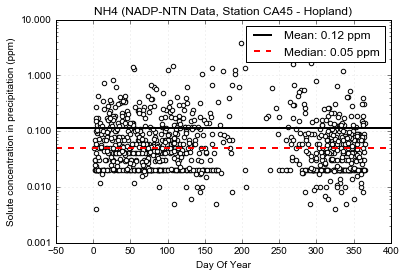

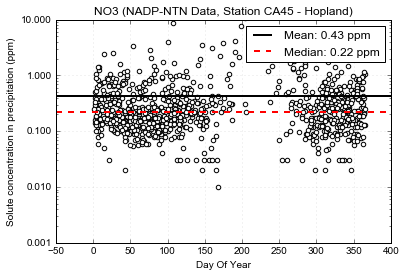

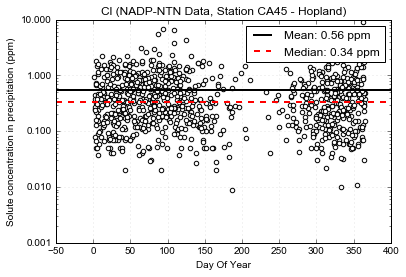

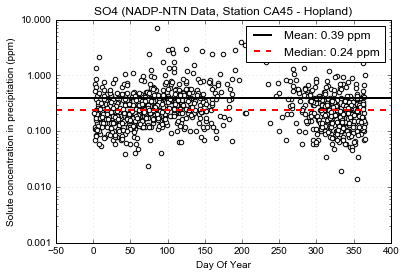

In [86]:
solutes = ['Ca', 'Mg', 'K', 'Na', 'NH4', 'NO3', 'Cl', 'SO4']


for solute in solutes:
    fig,ax=plt.subplots()

    plt.scatter(df['doy'].values,df[solute].values,facecolor='white')
    plt.ylim([0.001,10])
    plt.xlabel('Day Of Year')
    plt.yscale('log')



    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    plt.grid(alpha=0.2)
    plt.axhline(df[solute].mean(),label='Mean: '+format(df[solute].mean(), '.2f') + ' ppm',color='k',lw=2)
    plt.axhline(df[solute].median(),label='Median: '+format(df[solute].median(), '.2f') + ' ppm',ls='--',color='red',lw=2)
    
    if solute == 'Ca':
        plt.axhline(0.12,label='Angelo Bulk Rainwater: 0.12 ppm',color='b',lw=2)    
        plt.axhline(0.40,label='Angelo Throughfall: 0.40 ppm',color='b',lw=2,ls='--')    
    if solute == 'Mg':
        plt.axhline(0.12,label='Angelo Bulk Rainwater: 0.12 ppm',color='b',lw=2)    
        plt.axhline(0.19,label='Angelo Throughfall: 0.19 ppm',color='b',lw=2,ls='--')    
    if solute == 'K':
        plt.axhline(0.20,label='Angelo Bulk Rainwater: 0.20 ppm',color='b',lw=2)    
        plt.axhline(1.25,label='Angelo Throughfall: 1.25 ppm',color='b',lw=2,ls='--')    
    if solute == 'Na':
        plt.axhline(.74,label='Angelo Bulk Rainwater: 0.74 ppm',color='b',lw=2)    
        plt.axhline(1.10,label='Angelo Throughfall: 1.10 ppm',color='b',lw=2,ls='--')    

    
    
    plt.ylabel('Solute concentration in precipitation (ppm)')
    plt.legend()
    plt.title(solute + ' (NADP-NTN Data, Station CA45 - Hopland)')
    plt.savefig('Figures\\DOY\\'+solute + '- DOY -Precipitation Timeseries, NADP-NTN Data, Station CA45 - Hopland.pdf')
    plt.show()